## Importing Libraries

In [2]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import essential models and functions from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

## Importing Data Set

In [3]:
dataset = pd.read_csv('dataset/pca-sleep-efficiency.csv')
dataset.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,...,smoking_status,exercise_frequency,exercise_frequency_filled,bed_time_edited,bed_time_encoded,wakeup_time_edited,wakeup_time_encoded,smoking,gender_type,sleep_quality
0,1,65,Female,01:00,07:00,6.0,0.88,18,70,12,...,Yes,3.0,3.0,1,1.0,7,7.0,1,0,-1.038628
1,2,69,Male,02:00,09:00,7.0,0.66,19,28,53,...,Yes,3.0,3.0,2,2.0,9,9.0,1,1,1.705723
2,3,40,Female,21:30,05:30,8.0,0.89,20,70,10,...,No,3.0,3.0,21,21.0,5,5.0,0,0,-0.876008
3,4,40,Female,02:30,08:30,6.0,0.51,23,25,52,...,Yes,1.0,1.0,2,2.0,8,8.0,1,0,2.028781
4,5,57,Male,01:00,09:00,8.0,0.76,27,55,18,...,No,3.0,3.0,1,1.0,9,9.0,0,1,0.192627


## Random Forest Regression

### Random Forest Regression based on Sleep Quality w.r.t. lifestyle Choices (bed time, sleep duration, caffeine consumption, alcohol consumption, smoking)

### Train Test Split

In [4]:
# Split the data into training and testing sets
X = dataset[['age','gender_type','wakeup_time_encoded','bed_time_encoded','sleep_duration', 'exercise_frequency_filled', 'caffeine_consumption_filled', 'alcohol_consumption_filled', 'smoking']]
y = dataset['sleep_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


### Create Random Forest Model

In [5]:
# Create a random forest model with trees
rf_model = RandomForestRegressor(n_estimators=50, random_state=10)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the response variable for the testing set
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)



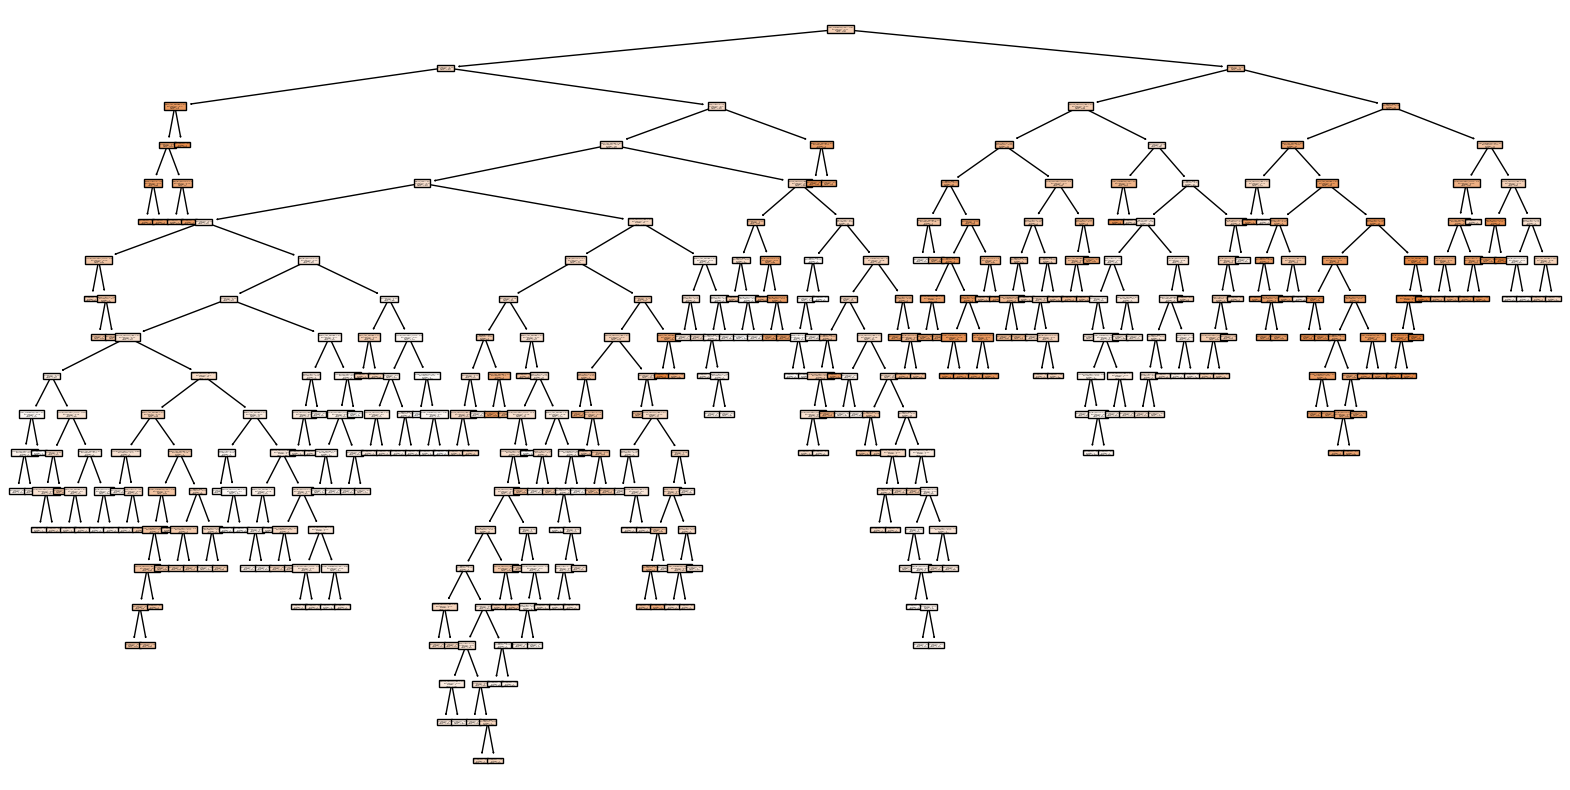

In [6]:
# Plot all the trees in the random forest
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[49], feature_names=X_train.columns, filled=True)
plt.show()

### Evaluate Model's Performance

In [7]:
#Check Prediction accuracy of the model on the Test set
print("R-squared \t:", r2_score(y_test, y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared 	: 0.38299493094294634
Mean Squared Error (MSE) 	: 0.654639935791905
Root Mean Squared Error (RMSE) 	: 0.8090982238219937


r2_score (also known as the coefficient of determination) measures the proportion of variance in the response variable that is explained by the predictors in the model. It is defined as 1 minus the ratio of the residual variance to the total variance of the response variable. The r2_score ranges from -1 to 1, with higher values indicating a better fit of the model to the data. A value of 1 indicates a perfect fit, while a value of 0 indicates that the model does not explain any of the variability in the response variable.

In [8]:
# Get feature importances
importances = rf_model.feature_importances_
for i, importance in enumerate(importances):
    print(f'Feature {i+1}: {X.columns[i]} - Importance: {importance}')

Feature 1: age - Importance: 0.25212458940924276
Feature 2: gender_type - Importance: 0.023553936132930373
Feature 3: wakeup_time_encoded - Importance: 0.09302943420427633
Feature 4: bed_time_encoded - Importance: 0.05234121133150192
Feature 5: sleep_duration - Importance: 0.08339166251805906
Feature 6: exercise_frequency_filled - Importance: 0.1334507597313538
Feature 7: caffeine_consumption_filled - Importance: 0.052677845725707606
Feature 8: alcohol_consumption_filled - Importance: 0.20646669185248595
Feature 9: smoking - Importance: 0.10296386909444227


In feature importance, the values represent the importance of each feature for predicting the target variable. It is typically used to identify the most important features in a dataset that are relevant for predicting the target variable. The higher the value, the more important the feature is. 

This is the ranking of the features according to their importance, from the above computation:
| Rank | Features | Feature importance |
| ------------ | --------- | ------------|
| 1 | age | 0.25287546869016014 |
| 2 | alcohol_consumption| 0.20639532408183847 |
| 3 | exercise_frequency | 0.13181440737931946 |
| 4 | smoking | 0.10328762844484661 |
| 5 | wakeup_time_encoded | 0.09436161480691739 |
| 6 | sleep_duration | 0.083304773803437 |
| 7 | caffeine_consumption | 0.05284697946805141 |
| 8 | bed_time_encoded | 0.051652960648978584 |
| 9 | gender_type | 0.023460842676450943 |

Age, alcohol consumption, and exercise frequency are the most important features while features like bedtime, and gender were less relevant in predicting our target variable – sleep quality.

### Make Prediction of Sleep Quality based on model

In [9]:
# Make a prediction for new data
new_data = pd.DataFrame({'age': [30], 'gender_type': [1], 'wakeup_time_encoded': [5], 'bed_time_encoded': [22], 'sleep_duration': [7], 'exercise_frequency_filled': [3], 'caffeine_consumption_filled': [2], 'alcohol_consumption_filled': [1], 'smoking': [0]})
prediction = rf_model.predict(new_data)
print('Prediction:', prediction)

Prediction: [0.50197635]
